In [1]:
!pip install wordcloud
!pip install xlrd
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import math
!pip install textblob
from textblob import TextBlob
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn. linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_excel("Amoxicillin.xlsx", sheet_name='Sheet2')
text_data = data['New Tweet']
text_data = text_data.fillna('')

data.head()

,Unnamed: 0,Author ID,Tweet ID,Language,Created at,Text,Word Count,New Tweet,Word Count.1,Location,Retweet Count,Subjectivity,Polarity,Analysis,Results,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,3,1030000000000000000,1690000000000000000,en,2023-08-21 09:09:19+00:00,"@bearish0411 if its COVID, amoxicillin will no...",23.0,its covid amoxicillin will not work pretty sur...,10.0,NaN,0,0.944444,0.375000,Positive,1,NaN,NaN,NaN
1,4,2245928095,1690000000000000000,en,2023-08-21 09:09:16+00:00,"@missmulrooney alarm. got it. coincidentally, ...",14.0,alarm got coincidentally i have just started a...,10.0,NaN,0,0.000000,0.300000,Positive,1,NaN,NaN,NaN
2,5,1590000000000000000,1690000000000000000,en,2023-08-21 08:47:58+00:00,RT @skdembe: #BeAntibioticsAware... It's #Anti...,15.0,#beantibioticsaware it is #antibioticawareness...,8.0,NaN,1,0.300000,1.000000,Positive,1,NaN,NaN,NaN
3,6,388774547,1690000000000000000,en,2023-08-21 08:47:22+00:00,''took her straight to drs AGAIN where the doc...,49.0,took straight drs again where doctor time says...,32.0,NaN,0,0.466667,0.233333,Positive,1,NaN,NaN,NaN
4,7,1480000000000000000,1690000000000000000,en,2023-08-21 07:40:46+00:00,Oh but Im allergic to amoxicillin,6.0,but im allergic amoxicillin,4.0,NaN,0,0.000000,0.000000,Negative,-1,NaN,NaN,NaN


In [3]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [4]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [5]:
X = data['New Tweet']
y = data['Results']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Replace missing values with empty strings
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Custom tokenization pattern to split tokens by spaces and hyphens
custom_token_pattern = r"(?u)\b\w\w+\b|[-']"

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    token_pattern=custom_token_pattern,
    lowercase=True,  # Convert text to lowercase
    stop_words='english',  # Remove common English stop words
    max_features=10000  # Limit the number of features to a reasonable size
)

Xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train)
Xtest_tfidf = tfidf_vectorizer.transform(X_test)

In [7]:
model1 = LogisticRegression()

# Train the model
model1.fit(Xtrain_tfidf, y_train)

LogisticRegression()

In [8]:
# Make predictions on the test set
y_pred = model1.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.5625
              precision    recall  f1-score   support

          -1       1.00      0.09      0.16        23
           1       0.54      1.00      0.70        25

    accuracy                           0.56        48
   macro avg       0.77      0.54      0.43        48
weighted avg       0.76      0.56      0.44        48



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


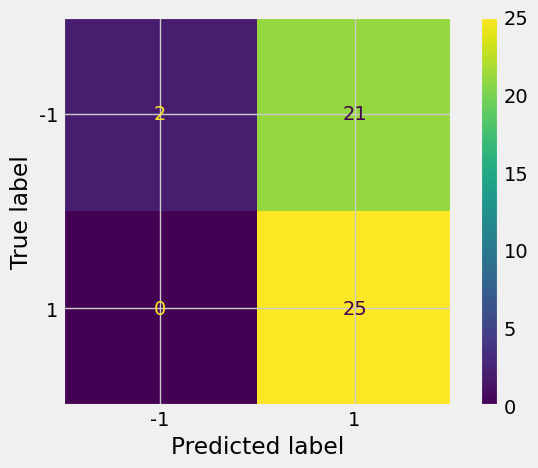

In [9]:
plot_confusion_matrix(model1, Xtest_tfidf, y_test)
plt.show()

In [10]:
model1_para = {
    'C': [0.001, 0.01, 0.1, 1, 2, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'multi_class': ['ovr', 'multinomial']
}

In [11]:
lgGSCV = GridSearchCV(model1, model1_para, scoring='accuracy', cv=10)
# Fit the GridSearchCV object to the training data
lgGSCV.fit(Xtrain_tfidf, y_train)

# Get the best hyperparameters and best model
best_params = lgGSCV.best_params_
print(best_params)
best_model = lgGSCV.best_estimator_

# Use the best model for predictions
y_pred = best_model.predict(Xtest_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

{'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 1120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: 

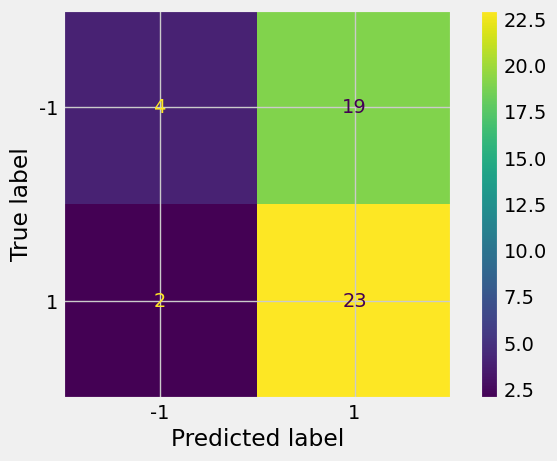

In [12]:
ConfusionMatrixDisplay.from_estimator(lgGSCV.best_estimator_, Xtest_tfidf, y_test)

In [13]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.67      0.17      0.28        23
           1       0.55      0.92      0.69        25

    accuracy                           0.56        48
   macro avg       0.61      0.55      0.48        48
weighted avg       0.60      0.56      0.49        48



In [14]:
rf = RandomForestClassifier()

# Train the model
rf.fit(Xtrain_tfidf, y_train)

RandomForestClassifier()

In [15]:
# Make predictions on the test set
y_pred = rf.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

          -1       1.00      0.13      0.23        23
           1       0.56      1.00      0.71        25

    accuracy                           0.58        48
   macro avg       0.78      0.57      0.47        48
weighted avg       0.77      0.58      0.48        48



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


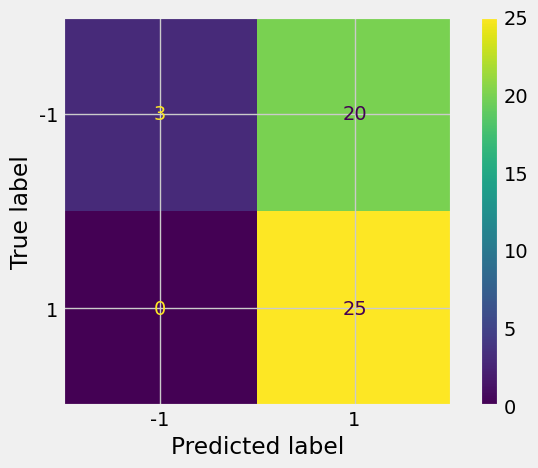

In [16]:
plot_confusion_matrix(rf, Xtest_tfidf, y_test)
plt.show()

In [17]:
rf_para = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2', None, 0.2, 0.5, 0.8],
    'criterion': ['gini', 'entropy'],
    'random_state': [None, 42]  # Use None for no fixed seed or an integer for reproducibility
}

In [18]:
rfGSCV = GridSearchCV(rf, rf_para, cv=10, scoring='accuracy')

rfGSCV.fit(Xtrain_tfidf, y_train)

best_params = rfGSCV.best_params_
print(best_params)
best_model = rfGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10, 'random_state': None}


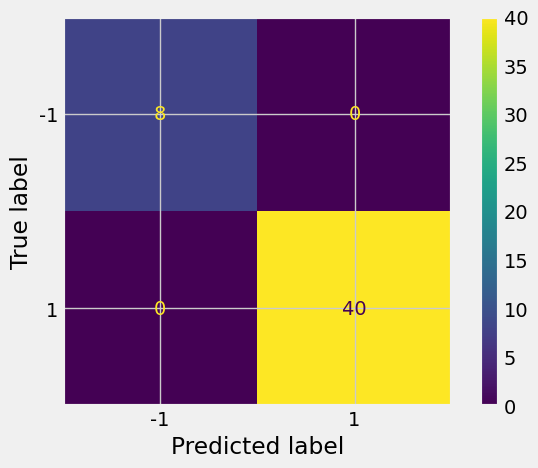

In [19]:
ConfusionMatrixDisplay.from_estimator(rfGSCV.best_estimator_, Xtest_tfidf, y_pred)

In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.88      0.30      0.45        23
           1       0.60      0.96      0.74        25

    accuracy                           0.65        48
   macro avg       0.74      0.63      0.60        48
weighted avg       0.73      0.65      0.60        48



In [21]:
nb = MultinomialNB()

# Train the model
nb.fit(Xtrain_tfidf, y_train)

MultinomialNB()

In [22]:
y_pred = nb.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.5208333333333334
              precision    recall  f1-score   support

          -1       0.50      0.13      0.21        23
           1       0.52      0.88      0.66        25

    accuracy                           0.52        48
   macro avg       0.51      0.51      0.43        48
weighted avg       0.51      0.52      0.44        48



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


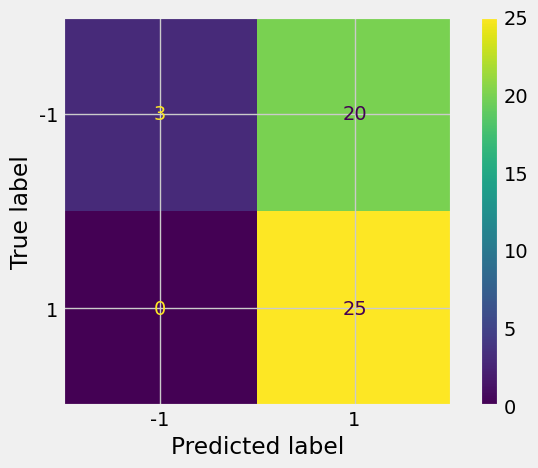

In [23]:
plot_confusion_matrix(rf, Xtest_tfidf, y_test)
plt.show()

In [24]:
param_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.3, 0.7], [0.2, 0.8], [0.5, 0.5]]  # Custom class priors if needed
}

In [25]:
nbGSCV = GridSearchCV(nb, param_grid, cv=10)
nbGSCV.fit(Xtrain_tfidf, y_train)

best_params = nbGSCV.best_params_
print(best_params)
best_model = nbGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  w

{'alpha': 0.1, 'class_prior': [0.2, 0.8], 'fit_prior': True}


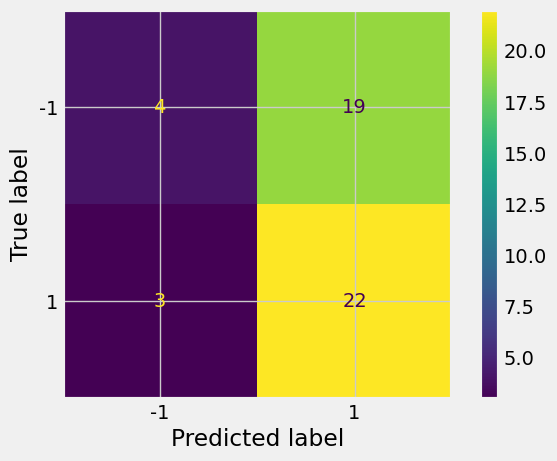

In [26]:
ConfusionMatrixDisplay.from_estimator(nbGSCV.best_estimator_, Xtest_tfidf, y_test)

In [27]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.57      0.17      0.27        23
           1       0.54      0.88      0.67        25

    accuracy                           0.54        48
   macro avg       0.55      0.53      0.47        48
weighted avg       0.55      0.54      0.48        48



In [28]:
# Create a base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
ad = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)

# Fit the AdaBoost classifier to your training data
ad.fit(Xtrain_tfidf, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [29]:
# Make predictions on the test set
y_pred = ad.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

          -1       0.73      0.48      0.58        23
           1       0.64      0.84      0.72        25

    accuracy                           0.67        48
   macro avg       0.68      0.66      0.65        48
weighted avg       0.68      0.67      0.65        48



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


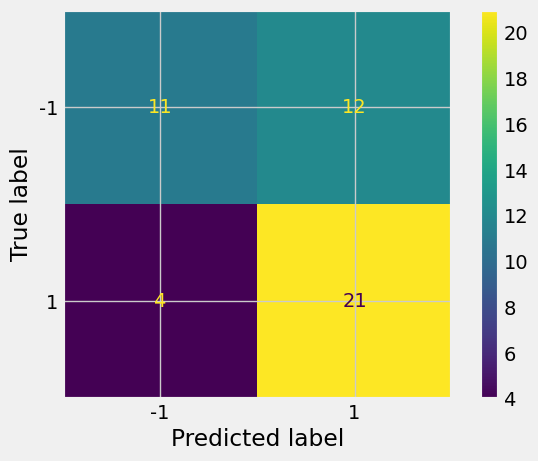

In [30]:
plot_confusion_matrix(ad, Xtest_tfidf, y_test)
plt.show()

In [31]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [32]:
adGSCV = GridSearchCV(ad, param_grid, cv=10)
adGSCV.fit(Xtrain_tfidf, y_train)

best_params = adGSCV.best_params_
print(best_params)
best_model = adGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}


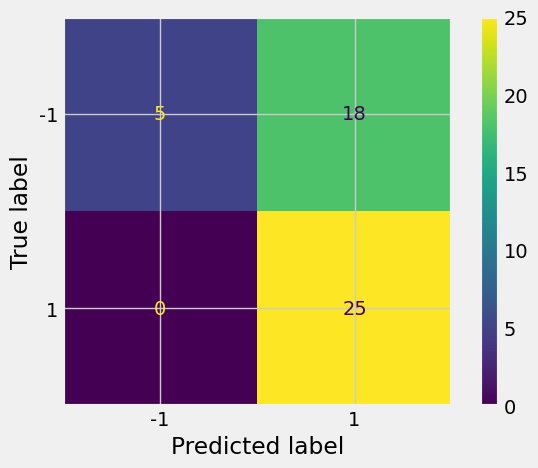

In [33]:
ConfusionMatrixDisplay.from_estimator(adGSCV.best_estimator_, Xtest_tfidf, y_test)

In [34]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       1.00      0.22      0.36        23
           1       0.58      1.00      0.74        25

    accuracy                           0.62        48
   macro avg       0.79      0.61      0.55        48
weighted avg       0.78      0.62      0.55        48



In [35]:
# Create an SVC classifier with default hyperparameters
svc = SVC()

# Fit the SVC classifier to your training data
svc.fit(Xtrain_tfidf, y_train)

SVC()

In [36]:
# Make predictions on the test set
y_pred = svc.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.5416666666666666
              precision    recall  f1-score   support

          -1       1.00      0.04      0.08        23
           1       0.53      1.00      0.69        25

    accuracy                           0.54        48
   macro avg       0.77      0.52      0.39        48
weighted avg       0.76      0.54      0.40        48



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


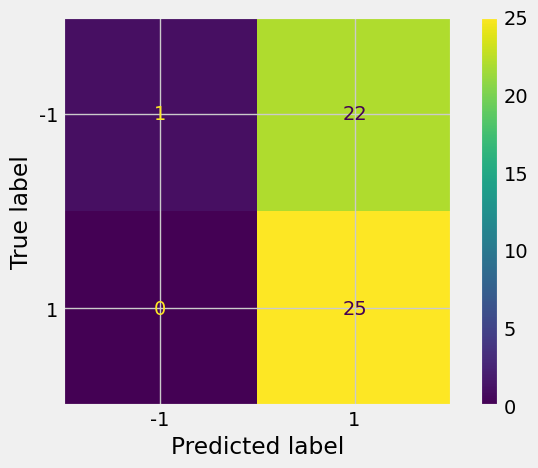

In [37]:
plot_confusion_matrix(svc, Xtest_tfidf, y_test)
plt.show()

In [38]:
param_grid= {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1.0],
    'class_weight': [None, 'balanced'],
    'probability': [True, False],
    'shrinking': [True, False],
    'decision_function_shape': ['ovo', 'ovr']
}

In [39]:
svcGSCV = GridSearchCV(svc, param_grid, cv=10)
svcGSCV.fit(Xtrain_tfidf, y_train)

best_params = svcGSCV.best_params_
print(best_params)
best_model = svcGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

{'C': 10.0, 'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'shrinking': True}


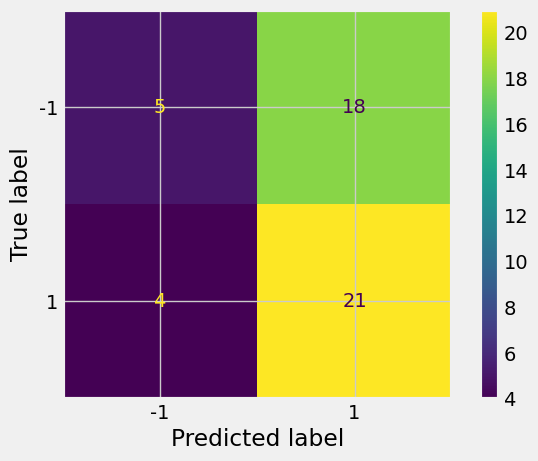

In [40]:
ConfusionMatrixDisplay.from_estimator(svcGSCV.best_estimator_, Xtest_tfidf, y_test)

In [41]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.56      0.22      0.31        23
           1       0.54      0.84      0.66        25

    accuracy                           0.54        48
   macro avg       0.55      0.53      0.48        48
weighted avg       0.55      0.54      0.49        48



## Nurofen Model

In [42]:
data = pd.read_excel("Nurofen.xlsx", sheet_name='Sheet2')
text_data = data['New Tweet']
text_data = text_data.fillna('')

In [43]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [44]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [45]:
X = data['New Tweet']
y = data['Results']

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Replace missing values with empty strings
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Custom tokenization pattern to split tokens by spaces and hyphens
custom_token_pattern = r"(?u)\b\w\w+\b|[-']"

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    token_pattern=custom_token_pattern,
    lowercase=True,  # Convert text to lowercase
    stop_words='english',  # Remove common English stop words
    max_features=10000  # Limit the number of features to a reasonable size
)

Xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train)
Xtest_tfidf = tfidf_vectorizer.transform(X_test)

In [47]:
model1 = LogisticRegression()

# Train the model
model1.fit(Xtrain_tfidf, y_train)

LogisticRegression()

In [48]:
# Make predictions on the test set
y_pred = model1.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.4166666666666667
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           1       0.42      1.00      0.59         5

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


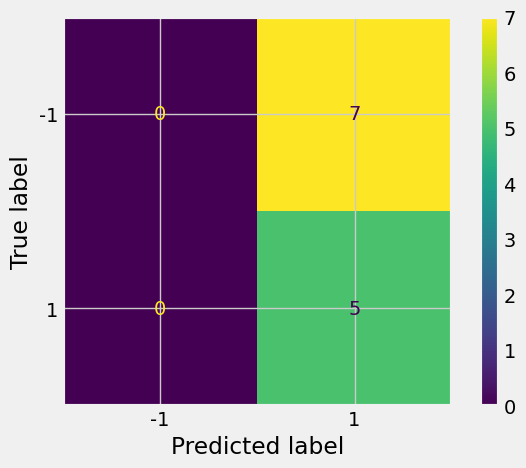

In [49]:
plot_confusion_matrix(model1, Xtest_tfidf, y_test)
plt.show()

In [50]:
model1_para = {
    'C': [0.001, 0.01, 0.1, 1, 2, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'multi_class': ['ovr', 'multinomial']
}

In [51]:
lgGSCV = GridSearchCV(model1, model1_para, scoring='accuracy', cv=10)
# Fit the GridSearchCV object to the training data
lgGSCV.fit(Xtrain_tfidf, y_train)

# Get the best hyperparameters and best model
best_params = lgGSCV.best_params_
print(best_params)
best_model = lgGSCV.best_estimator_

# Use the best model for predictions
y_pred = best_model.predict(Xtest_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter w

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ di

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

{'C': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 1120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: 

In [52]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.67      0.29      0.40         7
           1       0.44      0.80      0.57         5

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



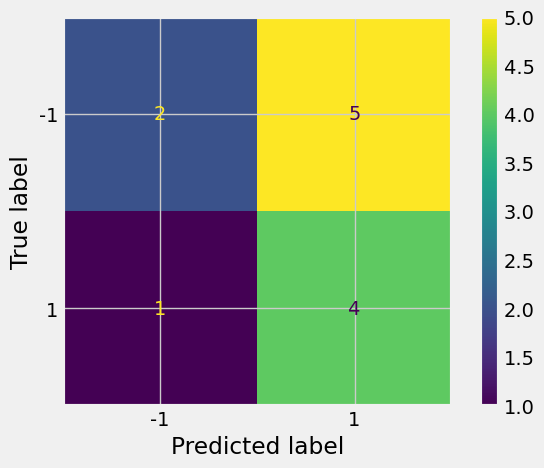

In [53]:
ConfusionMatrixDisplay.from_estimator(lgGSCV.best_estimator_, Xtest_tfidf, y_test)

In [54]:
rf = RandomForestClassifier()

# Train the model
rf.fit(Xtrain_tfidf, y_train)

RandomForestClassifier()

In [55]:
# Make predictions on the test set
y_pred = rf.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.4166666666666667
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           1       0.42      1.00      0.59         5

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


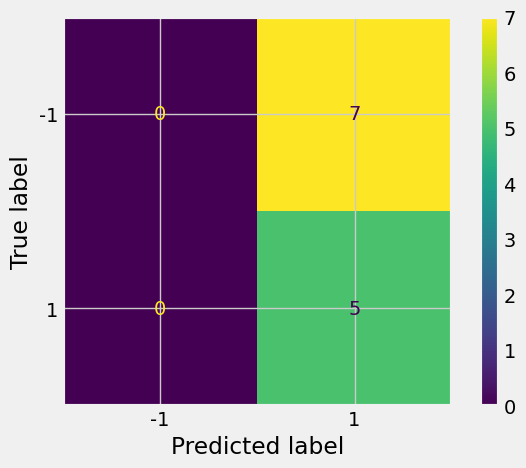

In [56]:
plot_confusion_matrix(rf, Xtest_tfidf, y_test)
plt.show()

In [57]:
rf_para = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2', None, 0.2, 0.5, 0.8],
    'criterion': ['gini', 'entropy'],
    'random_state': [None, 42]  # Use None for no fixed seed or an integer for reproducibility
}

In [58]:
rfGSCV = GridSearchCV(rf, rf_para, cv=10, scoring='accuracy')

rfGSCV.fit(Xtrain_tfidf, y_train)

best_params = rfGSCV.best_params_
print(best_params)
best_model = rfGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


{'criterion': 'gini', 'max_depth': None, 'max_features': 0.2, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10, 'random_state': None}


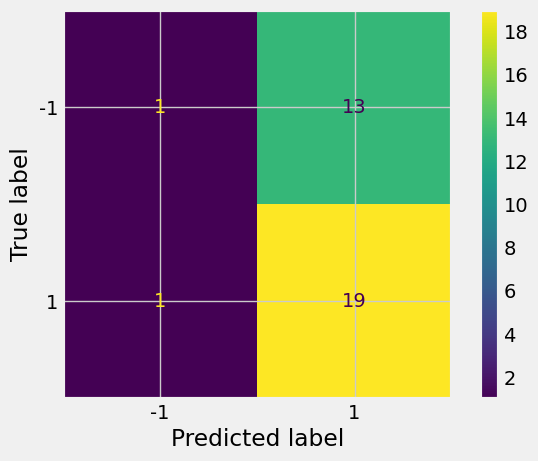

In [122]:
ConfusionMatrixDisplay.from_estimator(rfGSCV.best_estimator_, Xtest_tfidf, y_test)

In [123]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.59      0.71      0.65        14
           1       0.76      0.65      0.70        20

    accuracy                           0.68        34
   macro avg       0.68      0.68      0.67        34
weighted avg       0.69      0.68      0.68        34



In [61]:
nb = MultinomialNB()

# Train the model
nb.fit(Xtrain_tfidf, y_train)

MultinomialNB()

In [62]:
# Make predictions on the test set
y_pred = nb.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.4166666666666667
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           1       0.42      1.00      0.59         5

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


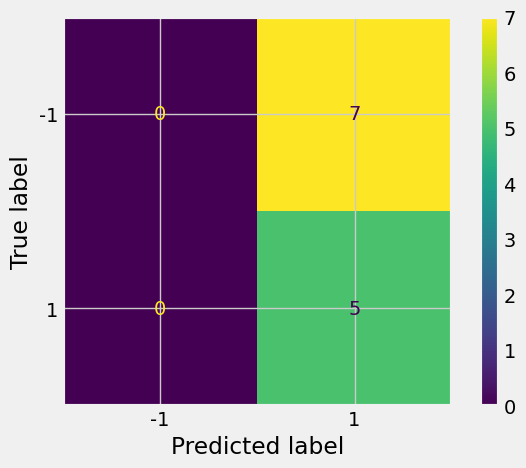

In [63]:
plot_confusion_matrix(nb, Xtest_tfidf, y_test)
plt.show()

In [64]:
 param_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.3, 0.7], [0.2, 0.8], [0.5, 0.5]]  # Custom class priors if needed
}

In [65]:
nbGSCV = GridSearchCV(nb, param_grid, cv=10)
nbGSCV.fit(Xtrain_tfidf, y_train)

best_params = nbGSCV.best_params_
print(best_params)
best_model = nbGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, sett

{'alpha': 0.5, 'class_prior': None, 'fit_prior': True}


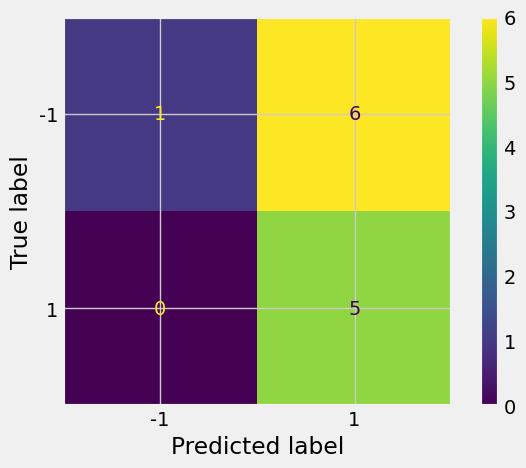

In [66]:
ConfusionMatrixDisplay.from_estimator(nbGSCV.best_estimator_, Xtest_tfidf, y_test)

In [67]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       1.00      0.14      0.25         7
           1       0.45      1.00      0.62         5

    accuracy                           0.50        12
   macro avg       0.73      0.57      0.44        12
weighted avg       0.77      0.50      0.41        12



In [68]:
# Create a base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
ad = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)

# Fit the AdaBoost classifier to your training data
ad.fit(Xtrain_tfidf, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [69]:
# Make predictions on the test set
y_pred = ad.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.5
              precision    recall  f1-score   support

          -1       0.67      0.29      0.40         7
           1       0.44      0.80      0.57         5

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


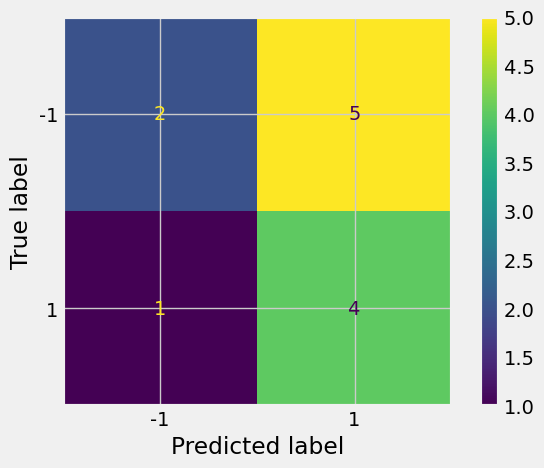

In [70]:
plot_confusion_matrix(ad, Xtest_tfidf, y_test)
plt.show()

In [71]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [72]:
adGSCV = GridSearchCV(ad, param_grid, cv=10)
adGSCV.fit(Xtrain_tfidf, y_train)

best_params = adGSCV.best_params_
print(best_params)
best_model = adGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 50}


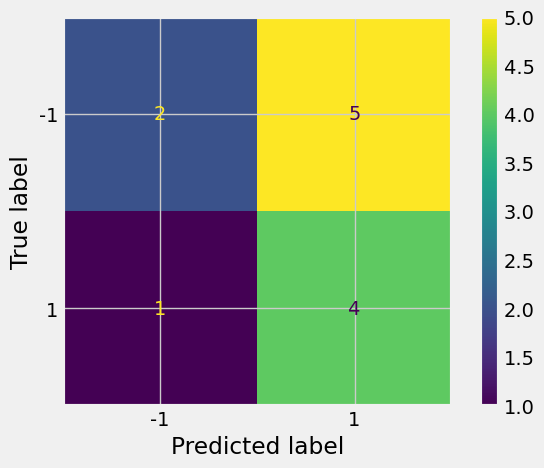

In [73]:
ConfusionMatrixDisplay.from_estimator(adGSCV.best_estimator_, Xtest_tfidf, y_test)

In [74]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.67      0.29      0.40         7
           1       0.44      0.80      0.57         5

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



In [75]:
# Create an SVC classifier with default hyperparameters
svc = SVC()

# Fit the SVC classifier to your training data
svc.fit(Xtrain_tfidf, y_train)

SVC()

In [76]:
# Make predictions on the test set
y_pred = svc.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.4166666666666667
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           1       0.42      1.00      0.59         5

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


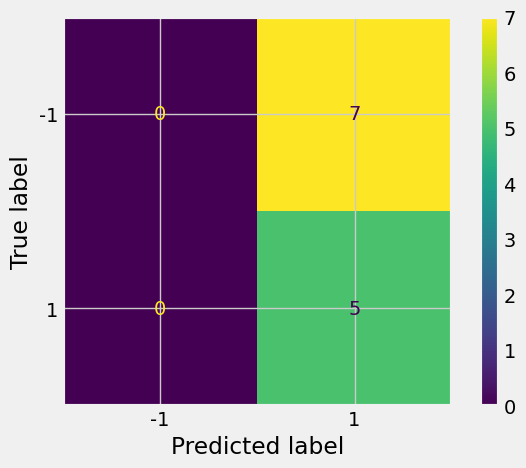

In [77]:
plot_confusion_matrix(svc, Xtest_tfidf, y_test)
plt.show()

In [78]:
param_grid= {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1.0],
    'class_weight': [None, 'balanced'],
    'probability': [True, False],
    'shrinking': [True, False],
    'decision_function_shape': ['ovo', 'ovr']
}

In [79]:
svcGSCV = GridSearchCV(svc, param_grid, cv=10)
svcGSCV.fit(Xtrain_tfidf, y_train)

best_params = svcGSCV.best_params_
print(best_params)
best_model = svcGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


{'C': 1.0, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'probability': True, 'shrinking': True}


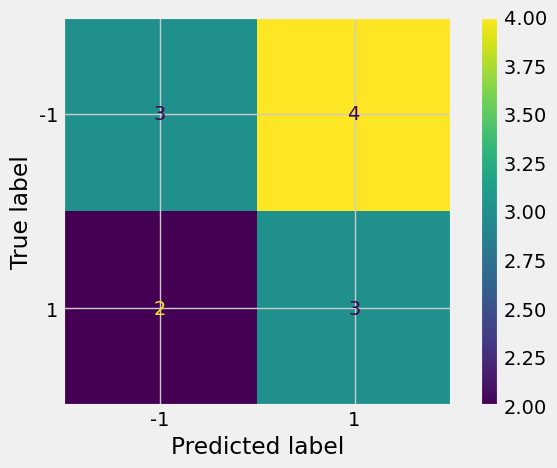

In [80]:
ConfusionMatrixDisplay.from_estimator(svcGSCV.best_estimator_, Xtest_tfidf, y_test)

In [81]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.60      0.43      0.50         7
           1       0.43      0.60      0.50         5

    accuracy                           0.50        12
   macro avg       0.51      0.51      0.50        12
weighted avg       0.53      0.50      0.50        12



## Lorazepam Model

In [82]:
data = pd.read_excel("Lorazepam.xlsx", sheet_name='Sheet2')
text_data = data['New Tweet']
text_data = text_data.fillna('')

In [83]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [84]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [85]:
X = data['New Tweet']
y = data['Results']

In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Replace missing values with empty strings
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Custom tokenization pattern to split tokens by spaces and hyphens
custom_token_pattern = r"(?u)\b\w\w+\b|[-']"

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    token_pattern=custom_token_pattern,
    lowercase=True,  # Convert text to lowercase
    stop_words='english',  # Remove common English stop words
    max_features=10000  # Limit the number of features to a reasonable size
)

Xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train)
Xtest_tfidf = tfidf_vectorizer.transform(X_test)

In [87]:
model1 = LogisticRegression()

# Train the model
model1.fit(Xtrain_tfidf, y_train)

LogisticRegression()

In [88]:
# Make predictions on the test set
y_pred = model1.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7352941176470589
              precision    recall  f1-score   support

          -1       0.86      0.43      0.57        14
           1       0.70      0.95      0.81        20

    accuracy                           0.74        34
   macro avg       0.78      0.69      0.69        34
weighted avg       0.77      0.74      0.71        34



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


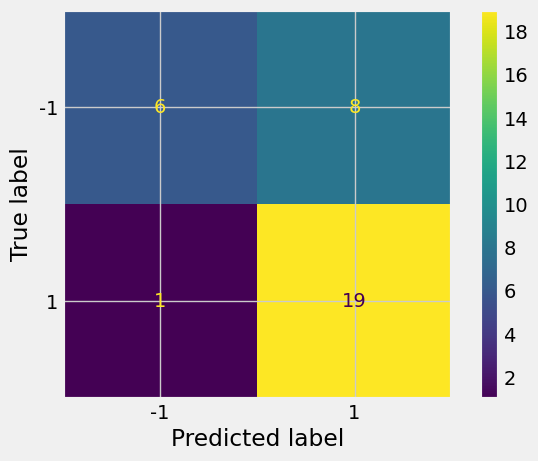

In [89]:
plot_confusion_matrix(model1, Xtest_tfidf, y_test)
plt.show()

In [90]:
model1_para = {
    'C': [0.001, 0.01, 0.1, 1, 2, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'multi_class': ['ovr', 'multinomial']
}

In [91]:
lgGSCV = GridSearchCV(model1, model1_para, scoring='accuracy', cv=10)
# Fit the GridSearchCV object to the training data
lgGSCV.fit(Xtrain_tfidf, y_train)

# Get the best hyperparameters and best model
best_params = lgGSCV.best_params_
print(best_params)
best_model = lgGSCV.best_estimator_

# Use the best model for predictions
y_pred = best_model.predict(Xtest_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

{'C': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'saga'}


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 1120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: 

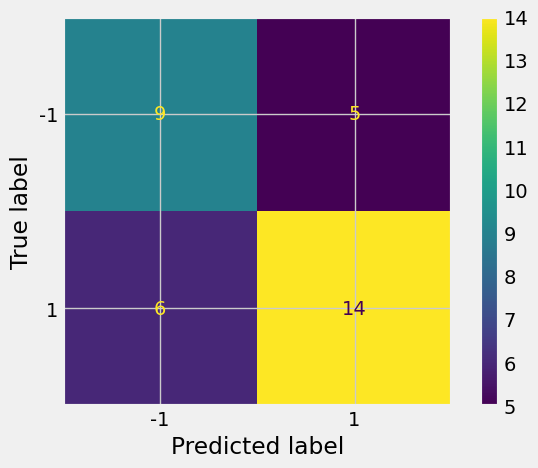

In [92]:
ConfusionMatrixDisplay.from_estimator(lgGSCV.best_estimator_, Xtest_tfidf, y_test)

In [93]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.60      0.64      0.62        14
           1       0.74      0.70      0.72        20

    accuracy                           0.68        34
   macro avg       0.67      0.67      0.67        34
weighted avg       0.68      0.68      0.68        34



In [94]:
rf = RandomForestClassifier()

# Train the model
rf.fit(Xtrain_tfidf, y_train)

RandomForestClassifier()

In [95]:
# Make predictions on the test set
y_pred = rf.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6470588235294118
              precision    recall  f1-score   support

          -1       0.60      0.43      0.50        14
           1       0.67      0.80      0.73        20

    accuracy                           0.65        34
   macro avg       0.63      0.61      0.61        34
weighted avg       0.64      0.65      0.63        34



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


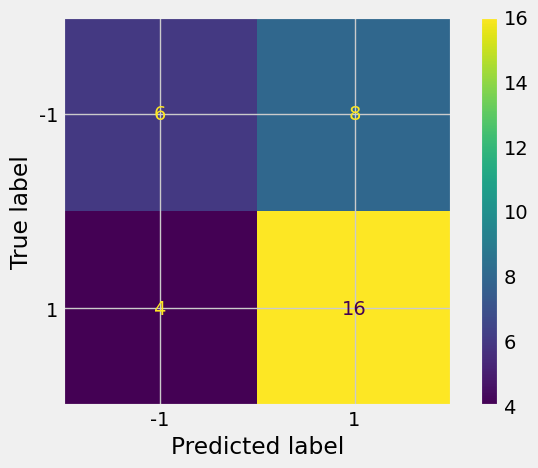

In [96]:
plot_confusion_matrix(rf, Xtest_tfidf, y_test)
plt.show()

In [97]:
rf_para = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2', None, 0.2, 0.5, 0.8],
    'criterion': ['gini', 'entropy'],
    'random_state': [None, 42]  # Use None for no fixed seed or an integer for reproducibility
}

In [98]:
rfGSCV = GridSearchCV(rf, rf_para, cv=10, scoring='accuracy')

rfGSCV.fit(Xtrain_tfidf, y_train)

best_params = rfGSCV.best_params_
print(best_params)
best_model = rfGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

{'criterion': 'entropy', 'max_depth': 40, 'max_features': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10, 'random_state': None}


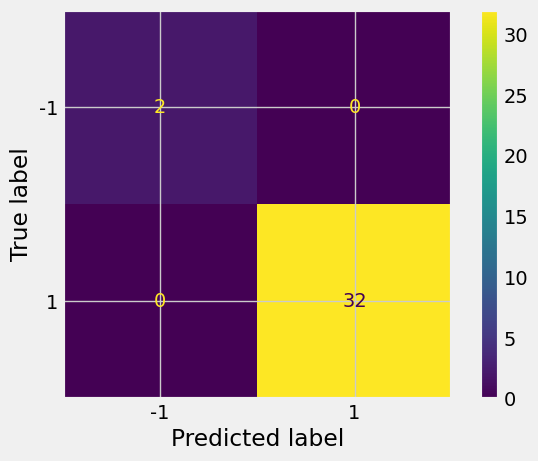

In [99]:
ConfusionMatrixDisplay.from_estimator(rfGSCV.best_estimator_, Xtest_tfidf, y_pred)  

In [100]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.50      0.07      0.12        14
           1       0.59      0.95      0.73        20

    accuracy                           0.59        34
   macro avg       0.55      0.51      0.43        34
weighted avg       0.56      0.59      0.48        34



In [101]:
nb = MultinomialNB()

# Train the model
nb.fit(Xtrain_tfidf, y_train)

MultinomialNB()

In [102]:
# Make predictions on the test set
y_pred = nb.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6764705882352942
              precision    recall  f1-score   support

          -1       0.67      0.43      0.52        14
           1       0.68      0.85      0.76        20

    accuracy                           0.68        34
   macro avg       0.67      0.64      0.64        34
weighted avg       0.67      0.68      0.66        34



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


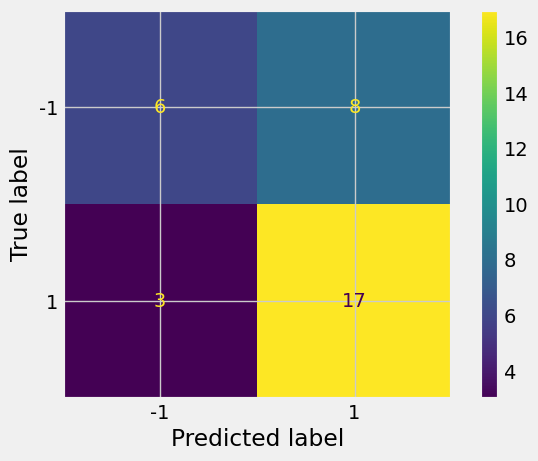

In [103]:
plot_confusion_matrix(nb, Xtest_tfidf, y_test)
plt.show()

In [104]:
 param_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.3, 0.7], [0.2, 0.8], [0.5, 0.5]]  # Custom class priors if needed
}

In [105]:
nbGSCV = GridSearchCV(nb, param_grid, cv=10)
nbGSCV.fit(Xtrain_tfidf, y_train)

best_params = nbGSCV.best_params_
print(best_params)
best_model = nbGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  w

{'alpha': 0.5, 'class_prior': None, 'fit_prior': True}


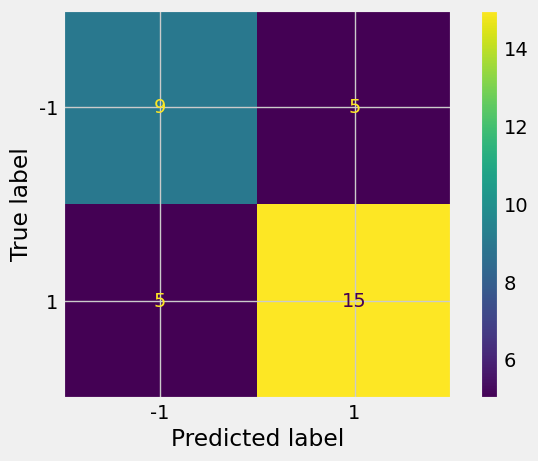

In [106]:
ConfusionMatrixDisplay.from_estimator(nbGSCV.best_estimator_, Xtest_tfidf, y_test)

In [107]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.64      0.64      0.64        14
           1       0.75      0.75      0.75        20

    accuracy                           0.71        34
   macro avg       0.70      0.70      0.70        34
weighted avg       0.71      0.71      0.71        34



In [108]:
# Create a base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
ad = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)

# Fit the AdaBoost classifier to your training data
ad.fit(Xtrain_tfidf, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [109]:
# Make predictions on the test set
y_pred = ad.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6470588235294118
              precision    recall  f1-score   support

          -1       0.62      0.36      0.45        14
           1       0.65      0.85      0.74        20

    accuracy                           0.65        34
   macro avg       0.64      0.60      0.60        34
weighted avg       0.64      0.65      0.62        34



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


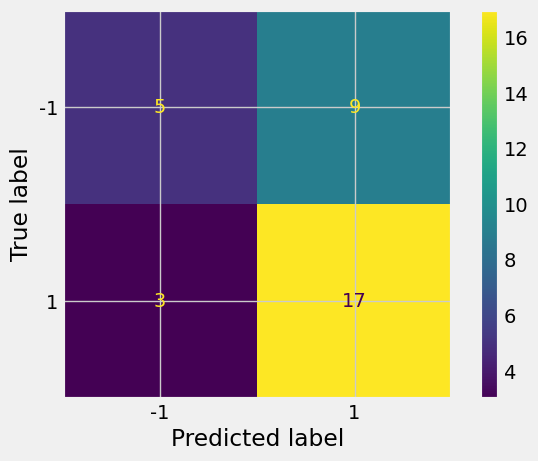

In [110]:
plot_confusion_matrix(ad, Xtest_tfidf, y_test)
plt.show()

In [111]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [112]:
adGSCV = GridSearchCV(ad, param_grid, cv=10)
adGSCV.fit(Xtrain_tfidf, y_train)

best_params = adGSCV.best_params_
print(best_params)
best_model = adGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}


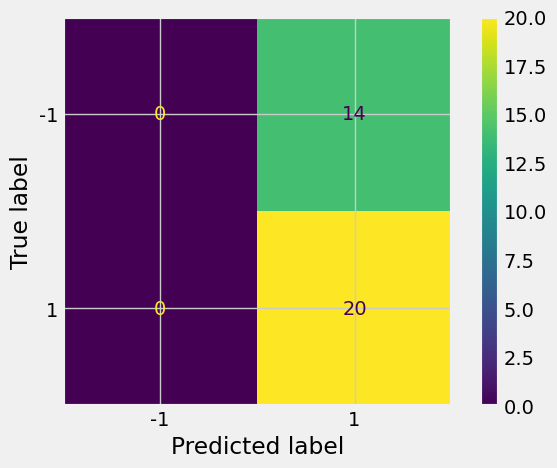

In [113]:
ConfusionMatrixDisplay.from_estimator(adGSCV.best_estimator_, Xtest_tfidf, y_test)

In [114]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        14
           1       0.59      1.00      0.74        20

    accuracy                           0.59        34
   macro avg       0.29      0.50      0.37        34
weighted avg       0.35      0.59      0.44        34



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
# Create an SVC classifier with default hyperparameters
svc = SVC()

# Fit the SVC classifier to your training data
svc.fit(Xtrain_tfidf, y_train)

SVC()

In [116]:
# Make predictions on the test set
y_pred = svc.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7058823529411765
              precision    recall  f1-score   support

          -1       0.83      0.36      0.50        14
           1       0.68      0.95      0.79        20

    accuracy                           0.71        34
   macro avg       0.76      0.65      0.65        34
weighted avg       0.74      0.71      0.67        34



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


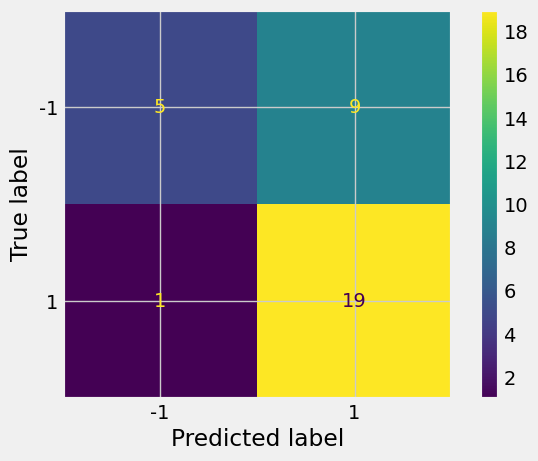

In [117]:
plot_confusion_matrix(svc, Xtest_tfidf, y_test)
plt.show()

In [118]:
param_grid= {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1.0],
    'class_weight': [None, 'balanced'],
    'probability': [True, False],
    'shrinking': [True, False],
    'decision_function_shape': ['ovo', 'ovr']
}

In [119]:
svcGSCV = GridSearchCV(svc, param_grid, cv=10)
svcGSCV.fit(Xtrain_tfidf, y_train)

best_params = svcGSCV.best_params_
print(best_params)
best_model = svcGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

{'C': 10.0, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid', 'probability': True, 'shrinking': True}


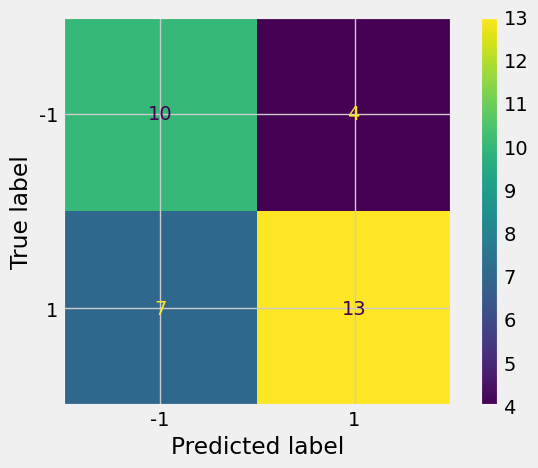

In [120]:
ConfusionMatrixDisplay.from_estimator(svcGSCV.best_estimator_, Xtest_tfidf, y_test)

In [121]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.59      0.71      0.65        14
           1       0.76      0.65      0.70        20

    accuracy                           0.68        34
   macro avg       0.68      0.68      0.67        34
weighted avg       0.69      0.68      0.68        34

